# Data Science amb Python


## Sprint 11 : Train and Test


#### Cristiane de Souza da Silva

May 2021

### Exercises 1
Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level


The data can be found [here](https://www.kaggle.com/giovamata/airlinedelaycauses?select=DelayedFlights.csv).
 
This dataset is composed by the following variables: 

1) Year 2008

2) Month 1-12

3) DayofMonth 1-31

4) DayOfWeek 1 (Monday) - 7 (Sunday)

5) DepTime actual departure time (local, hhmm)

6) CRSDepTime scheduled departure time (local, hhmm)

7) ArrTime actual arrival time (local, hhmm)

8) CRSArrTime scheduled arrival time (local, hhmm)

9) UniqueCarrier unique carrier code

10) FlightNum flight number

11) TailNum plane tail number: aircraft registration, unique aircraft identifier 

12) ActualElapsedTime in minutes

13) CRSElapsedTime in minutes

14) AirTime in minutes

15) ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later -the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).

16) DepDelay departure delay, in minutes

17) Origin origin IATA airport code

18) Dest destination IATA airport code

19) Distance in miles

20) TaxiIn taxi in time, in minutes

21) TaxiOut taxi out time in minutes

22) Cancelled *was the flight cancelled

23) CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24) Diverted 1 = yes, 0 = no

25) CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

26) WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

27) NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

28) SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

29) LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [1]:
import numpy as np
import pandas as pd

In [35]:
# Import  data 

url = 'https://www.kaggle.com/giovamata/airlinedelaycauses?select=DelayedFlights.csv'

df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [6]:
# Find how many missing data are per column
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
df_clean = df.copy()

In [8]:
# Create departure date column
# Convert time
df_clean['DepDate'] = pd.to_datetime(df_clean.Year*10000+df.Month*100+df_clean.DayofMonth ,format='%Y%m%d')


In [9]:
df_clean.drop(['Year', 'Month', 'DayofMonth'], axis=1, inplace=True)

#### Deal with missing data
* Replace by mean
  - ArrTime, ActualElapsedTime , CRSElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay
  
* Replace by 'No_Registration'
  - TailNum

* Drop the whole row:
  - LateAircraftDelay --> Reason: Arrival Delay is what we want to predict. Any data entry without arrival delay data cannot be used for prediction; 

In [10]:
# Replace by mean

df_clean['ArrTime'].fillna(df_clean['ArrTime'].mean(), inplace=True)
df_clean['ActualElapsedTime'].fillna(df_clean['ActualElapsedTime'].mean(), inplace=True)
df_clean['CRSElapsedTime'].fillna(df_clean['CRSElapsedTime'].mean(), inplace=True)
df_clean['AirTime'].fillna(df_clean['AirTime'].mean(), inplace=True)
df_clean['ArrDelay'].fillna(df_clean['ArrDelay'].mean(), inplace=True)
df_clean['TaxiIn'].fillna(df_clean['TaxiIn'].mean(), inplace=True)
df_clean['TaxiOut'].fillna(df_clean['TaxiOut'].mean())
df_clean['CarrierDelay'].fillna(df_clean['CarrierDelay'].mean(), inplace=True)
df_clean['WeatherDelay'].fillna(df_clean['WeatherDelay'].mean(), inplace=True)
df_clean['NASDelay'].fillna(df_clean['NASDelay'].mean(), inplace=True)
df_clean['SecurityDelay'].fillna(df_clean['SecurityDelay'].mean(), inplace=True)


In [11]:
df_clean['TailNum'].fillna('No_Registration', inplace=True)

In [12]:
# drop whole row with NaN in "LateAircraftDelay" column
df_clean.dropna(subset=["LateAircraftDelay"], axis=0, inplace=True)

# reset index
df_clean.reset_index(drop=True, inplace=True)

In [13]:
df_clean.isnull().sum()

DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDate              0
dtype: int64

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247488 entries, 0 to 1247487
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   DayOfWeek          1247488 non-null  int64         
 1   DepTime            1247488 non-null  float64       
 2   CRSDepTime         1247488 non-null  int64         
 3   ArrTime            1247488 non-null  float64       
 4   CRSArrTime         1247488 non-null  int64         
 5   UniqueCarrier      1247488 non-null  object        
 6   FlightNum          1247488 non-null  int64         
 7   TailNum            1247488 non-null  object        
 8   ActualElapsedTime  1247488 non-null  float64       
 9   CRSElapsedTime     1247488 non-null  float64       
 10  AirTime            1247488 non-null  float64       
 11  ArrDelay           1247488 non-null  float64       
 12  DepDelay           1247488 non-null  float64       
 13  Origin             1247488 

In [15]:
df_clean.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
0,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
1,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,...,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,2008-01-03
2,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,...,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,2008-01-03
3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,...,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,2008-01-03
4,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,...,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,2008-01-03


In [16]:
# Feature Selection

corr_matrix = df_clean.corr()

corr_matrix['LateAircraftDelay'].sort_values(ascending=False)


LateAircraftDelay    1.000000
DepDelay             0.513041
ArrDelay             0.478123
DepTime              0.169453
CRSDepTime           0.167734
CRSArrTime           0.131467
DayOfWeek            0.008839
TaxiIn              -0.006983
Distance            -0.010578
CRSElapsedTime      -0.011584
SecurityDelay       -0.019227
AirTime             -0.021997
ActualElapsedTime   -0.034204
ArrTime             -0.037949
FlightNum           -0.052708
WeatherDelay        -0.054971
TaxiOut             -0.055821
NASDelay            -0.118905
CarrierDelay        -0.178286
Cancelled                 NaN
Diverted                  NaN
Name: LateAircraftDelay, dtype: float64

Hereunder I choose the attributes most relevant for the task.

In [17]:
corr_matrix['LateAircraftDelay'].sort_values(ascending=False).index[:6]

Index(['LateAircraftDelay', 'DepDelay', 'ArrDelay', 'DepTime', 'CRSDepTime',
       'CRSArrTime'],
      dtype='object')

In [18]:
feature_selection = corr_matrix['LateAircraftDelay'].sort_values(ascending=False).index[:6]

df_selected = df_clean[feature_selection]
df_selected.head()

,LateAircraftDelay,DepDelay,ArrDelay,DepTime,CRSDepTime,CRSArrTime
0,32.0,34.0,34.0,1829.0,1755,1925
1,47.0,67.0,57.0,1937.0,1830,1940
2,72.0,94.0,80.0,1644.0,1510,1725
3,12.0,27.0,15.0,1452.0,1425,1625
4,16.0,28.0,16.0,1323.0,1255,1510


In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247488 entries, 0 to 1247487
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   LateAircraftDelay  1247488 non-null  float64
 1   DepDelay           1247488 non-null  float64
 2   ArrDelay           1247488 non-null  float64
 3   DepTime            1247488 non-null  float64
 4   CRSDepTime         1247488 non-null  int64  
 5   CRSArrTime         1247488 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 57.1 MB


#### Training and Test

In [20]:
from sklearn.model_selection import train_test_split

y = df_selected['LateAircraftDelay']

X = df_selected.drop('LateAircraftDelay',axis=1)


In [21]:
X.columns

Index(['DepDelay', 'ArrDelay', 'DepTime', 'CRSDepTime', 'CRSArrTime'], dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 374247
number of training samples: 873241


### Exercises 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).



#### Normaliza Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)
 

In [24]:
standardized_X[:5]

array([[-0.54553718, -0.79453778,  0.21530108,  0.33680385,  0.34065257],
       [ 0.62314255,  0.66984854,  1.65753343,  1.53569113,  1.41260638],
       [-0.89614109, -0.79453778, -2.0658481 , -2.0728409 , -1.81624843],
       [ 0.68992425,  0.53821831,  1.09385178,  1.0134036 ,  0.96866591],
       [-0.61231887, -0.64645377, -1.64308687, -1.75234628, -1.57587091]])

### Exercises 3
Summarize the new columns generated statistically and graphically

In [25]:
df_standardized=pd.DataFrame(standardized_X, columns=X.columns) 
df_standardized

,DepDelay,ArrDelay,DepTime,CRSDepTime,CRSArrTime
0,-0.545537,-0.794538,0.215301,0.336804,0.340653
1,0.623143,0.669849,1.657533,1.535691,1.412606
2,-0.896141,-0.794538,-2.065848,-2.072841,-1.816248
3,0.689924,0.538218,1.093852,1.013404,0.968666
4,-0.612319,-0.646454,-1.643087,-1.752346,-1.575871
...,...,...,...,...,...
873236,1.674954,1.492537,0.827424,0.396155,0.124096
873237,-0.896141,-0.712269,0.213099,0.384285,0.351480
873238,0.923660,0.653395,-0.053328,-0.351666,-0.066473
873239,-0.528842,-0.712269,0.382644,0.514856,0.394792


In [26]:
df_standardized.describe()

,DepDelay,ArrDelay,DepTime,CRSDepTime,CRSArrTime
count,8.732410e+05,8.732410e+05,8.732410e+05,8.732410e+05,8.732410e+05
mean,7.578665e-17,8.453464e-17,-1.282214e-16,-1.712018e-17,-1.993527e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-8.961411e-01,-7.945378e-01,-3.431015e+00,-3.532872e+00,-3.579017e+00
25%,-5.956234e-01,-6.135462e-01,-7.204985e-01,-8.027326e-01,-6.771622e-01
50%,-3.118012e-01,-3.338320e-01,1.316296e-01,9.702639e-02,1.500830e-01
75%,2.558432e-01,2.585041e-01,8.054053e-01,8.116107e-01,7.997520e-01
max,4.002434e+01,3.945141e+01,1.851299e+00,2.067475e+00,1.529547e+00


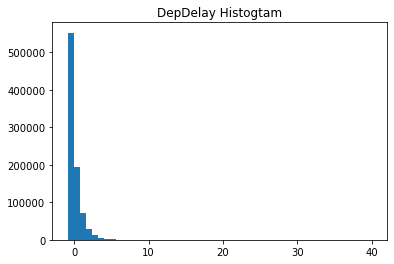

In [28]:
import matplotlib.pyplot as plt

plt.hist(df_standardized["DepDelay"], bins=50)
plt.title('DepDelay Histogtam');

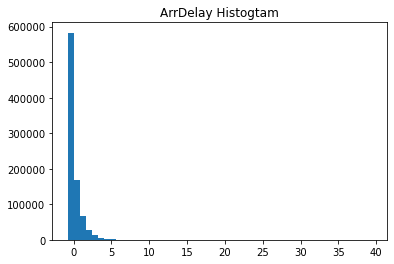

In [29]:
plt.hist(df_standardized["ArrDelay"], bins=50)
plt.title('ArrDelay Histogtam');

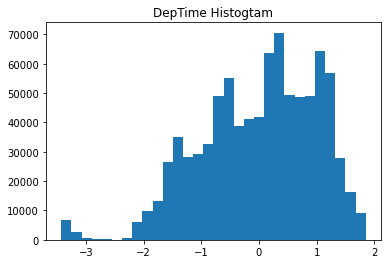

In [30]:
plt.hist(df_standardized["DepTime"], bins=30)
plt.title('DepTime Histogtam');

<AxesSubplot:xlabel='DepDelay'>

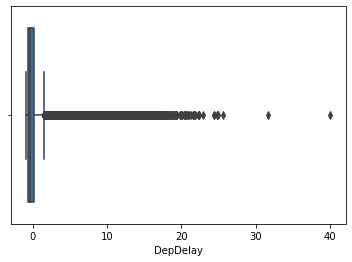

In [33]:
import seaborn as sns
sns.boxplot('DepDelay', data=df_standardized)